In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
sigmoid(100)

1.0

In [8]:
sigmoid(-100)

3.7200759760208356e-44

In [9]:
sigmoid(0)

0.5

In [19]:
x = np.arange(-10, 10, 0.1)
# x

In [20]:
y = sigmoid(x)

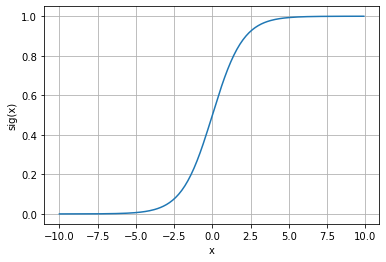

In [24]:
plt.plot(x, y)
plt.grid("on")
plt.xlabel("x")
plt.ylabel("sig(x)");

In [26]:
def log_loss(y, y_hat):
    loss = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
    return -loss

In [27]:
log_loss(1, 0.99)

0.01005033585350145

In [28]:
log_loss(1, 0.5)

0.6931471805599453

In [29]:
log_loss(1, 0.1)

2.3025850929940455

In [30]:
log_loss(0, 0.001)

0.0010005003335835344

In [44]:
def hypothesis(X, W):
    return sigmoid(np.dot(X, W))

In [45]:
def error(X, Y, W):
    Y_hat = hypothesis(X, W)

    err = Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)
    
    return -err.mean()

In [31]:
def gradient(X, Y, W):
    Y_hat = hypothesis(X, W)
    grad = np.dot(X.T, (Y_hat - Y))
    
    return 2*grad/len(X)

In [49]:
def gradient_descent(X, Y, max_itr = 100, learning_rate = 0.1):
    # step 1 : init() randomly
    
    W = np.random.rand(X.shape[1], 1)
    error_list = []
    
    # step 2: repeate 100 times
    for i in range(max_itr):
        e = error(X, Y, W)
        error_list.append(e)
        
        grad = gradient(X, Y, W)
        W = W - learning_rate*grad
        
    
    return W.round(3), error_list

In [33]:
from sklearn.datasets import make_classification

In [72]:
X, y = make_classification(n_samples=500, 
                    n_features=2, 
                    n_redundant=0,
                    n_clusters_per_class=1, 
                    random_state=5 )

In [73]:
X.shape

(500, 2)

In [74]:
y= y.reshape(-1,1)
y.shape

(500, 1)

In [75]:
X[:5]

array([[ 1.22167239, -0.4757541 ],
       [-0.2292072 , -1.85663378],
       [-1.34913896,  0.50458721],
       [ 0.31402206, -1.62029248],
       [ 1.13807877, -0.99148158]])

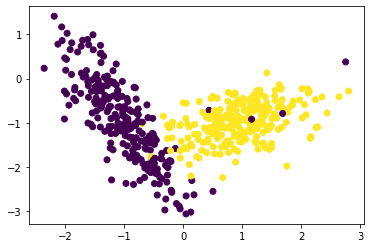

In [76]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [77]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))

In [78]:
X_new.shape

(500, 3)

In [79]:
X_new[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [80]:
opt_weights, loss =  gradient_descent(X_new, y, max_itr=200)

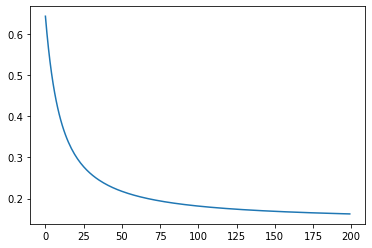

In [81]:
plt.plot(loss)

In [82]:
opt_weights

array([[0.794],
       [3.182],
       [0.557]])

In [83]:
X_new[50]

array([ 1.        ,  1.24405272, -1.31255076])

## Prediction

In [84]:
hypothesis(X_new[50], opt_weights)

array([0.98238937])

In [85]:
Y_hat = hypothesis(X_new, opt_weights)
Y_hat[:5]

array([[0.9880661 ],
       [0.2749837 ],
       [0.03849745],
       [0.70903776],
       [0.97942948]])

In [86]:
predictions = Y_hat.round().astype('int')
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

## Performance

In [88]:
# predictions

In [89]:
(y==predictions).mean()*100

96.0